## Лабораторная работа №2 по предмету ПМиАОЗД

### Импортируем нужные нам библиотеки

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Считываем наш файл данных

In [41]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Закрепим passengerId как очновной индекс

In [42]:
df.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Создадим круговую диаграмму для отображения количества мужчин и женщин на борту корабля

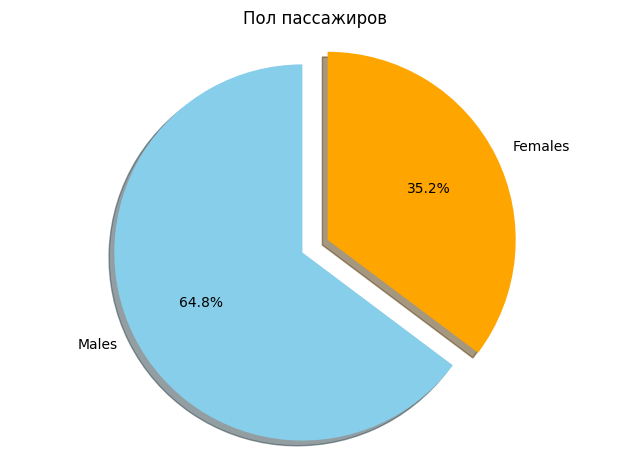

In [63]:
# суммируем количество мужчин и женщин
males = (df['Sex'] == 'male').sum()
females = (df['Sex'] == 'female').sum()

# помещяем их в лист, для дальнейшей работы с ними
proportions = [males, females]

# создание круговой диаграммы
plt.pie(proportions, labels = ['Males', 'Females'],shadow = True, colors = ['skyblue','orange'], explode = (0.15 , 0), startangle = 90,autopct = '%1.1f%%')
plt.axis('equal')
# задаём описание
plt.title("Пол пассажиров")
# jотображение
plt.tight_layout()
plt.show()

### Создадим диаграмму рассивания с указанием оплаченного тарифа и возраста пассажиров

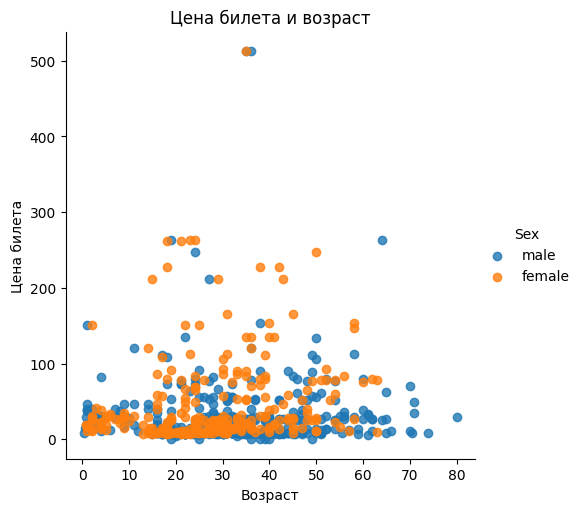

In [62]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = df, hue = 'Sex', fit_reg=False)

# задаём описание
lm.set(title = 'Цена билета и возраст')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
axes = lm.axes
plt.show()

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Посчитаем количество выживших человек 

In [46]:
df1 = df.Survived.sum()
df1

342

### Создадим гистограмму для цены билета и зависимост от количества людей

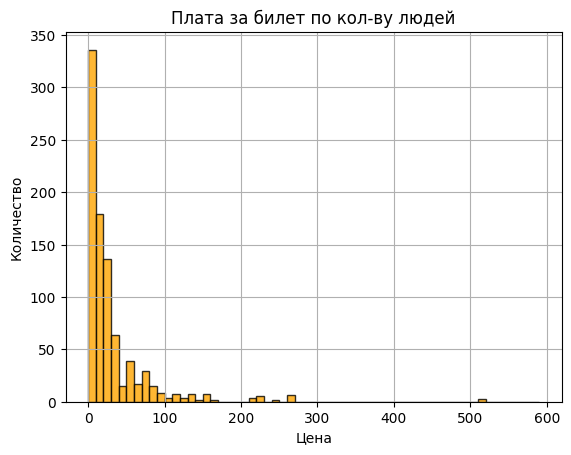

In [59]:
# сортируе значения от боьшего к меньшему по значению
dff = df.Fare.sort_values(ascending = False)
dff

binsVal = np.arange(0,600,10)

plt.hist(dff, bins = binsVal, color='orange', alpha=0.8, align='mid', edgecolor='black', linewidth=1)

# задаём описание графика
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Плата за билет по кол-ву людей')

# отображаем график
plt.grid ( True )
plt.show()